In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pylab as pl

In [62]:
country_name = 'South Korea'
country_pop = 51.47e6

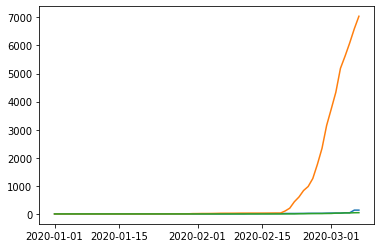

In [80]:
dfs = []
states = ['recovered', 'confirmed', 'deaths']
for state in states:
    df = pd.read_csv('data/{}.csv'.format(state))
    h = df[df['Country/Region'] == country_name]
    h = h.transpose().iloc[4:]
    h = h.sum(axis=1)
    h.columns = [state]
    dfs.append(h)
country = pd.DataFrame(index=dfs[0].index)
for df in dfs:
    country[df.columns[0]] = df

# adding dates so that models can start earlier
added = pd.DataFrame(0, index=['1/{}/20'.format(i) for i in range(1, 22)], columns=states)
country = added.append(country)

country.index = pd.to_datetime(country.index)

plt.plot(country)
plt.show()

In [81]:
points_removed = 5
# removing last few data points from generating model since this probably slows due to quarantine
country_model = country[:-points_removed]

# Regression

In [70]:
TS=1.0 # time step
ND=len(country_model) # num of days
S0=1-(1/country_pop) # % of population initially healthy
I0=1/country_pop # % of population initially infected
INPUT = (S0, I0, 0.0)

res = {}

# trying to regress params and finding least squared error
for beta in np.arange(.2, .5, .01):
    for gamma in np.arange(.05, .2, .01):
        for delay in range(0, 30):

            def diff_eqs(INP,t):
                '''The main set of equations'''
                Y=np.zeros((3))
                V = INP
                Y[0] = - beta * V[0] * V[1]
                Y[1] = beta * V[0] * V[1] - gamma * V[1]
                Y[2] = gamma * V[1]
                return Y   # For odeint

            t_start = 0.0; t_end = ND; t_inc = TS
            t_range = np.arange(t_start, t_end+t_inc, t_inc)
            RES = spi.odeint(diff_eqs,INPUT,t_range)

            recovered = RES[:,2][:len(country_model)-delay]
            infectious = RES[:,1][:len(country_model)-delay]

            country_infectious = [x/country_pop for x in country_model['confirmed']][delay:]
            country_recovered = [x/country_pop for x in country_model['recovered']+country['deaths']][delay:]

            i_error = sum([(infectious[i] - country_infectious[i]) ** 2 for i in range(len(infectious))])
            r_error = sum([(recovered[i] - country_recovered[i]) ** 2 for i in range(len(recovered))])

            error = i_error + r_error

            res[(beta, gamma, delay)] = error

            print('beta: {}, gamma: {}, error: {}'.format(beta, gamma, error))

beta: 0.2, gamma: 0.05, error: 5.024190399352668e-08
beta: 0.2, gamma: 0.05, error: 3.340796515854644e-08
beta: 0.2, gamma: 0.05, error: 2.177315918423696e-08
beta: 0.2, gamma: 0.05, error: 1.3873295279871133e-08
beta: 0.2, gamma: 0.05, error: 8.640368260212154e-09
beta: 0.2, gamma: 0.05, error: 5.297234386541384e-09
beta: 0.2, gamma: 0.05, error: 3.279514671509141e-09
beta: 0.2, gamma: 0.05, error: 2.1797453660912282e-09
beta: 0.2, gamma: 0.05, error: 1.7049318531967795e-09
beta: 0.2, gamma: 0.05, error: 1.645894049283429e-09
beta: 0.2, gamma: 0.05, error: 1.8539847761051072e-09
beta: 0.2, gamma: 0.05, error: 2.224869638832362e-09
beta: 0.2, gamma: 0.05, error: 2.6861825814584334e-09
beta: 0.2, gamma: 0.05, error: 3.188291537449323e-09
beta: 0.2, gamma: 0.05, error: 3.6983105409158537e-09
beta: 0.2, gamma: 0.05, error: 4.194874438695707e-09
beta: 0.2, gamma: 0.05, error: 4.665442183785365e-09
beta: 0.2, gamma: 0.05, error: 5.103041911935762e-09
beta: 0.2, gamma: 0.05, error: 5.5041153

beta: 0.2, gamma: 0.12000000000000001, error: 8.230728371236964e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.246715289352663e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.261521102026951e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.27532878846534e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.288167974638616e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.300059922949005e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.31103470911267e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.321136243144774e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.330428754890733e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.339003899204236e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.34697935992698e-09
beta: 0.2, gamma: 0.12000000000000001, error: 8.354386513227886e-09
beta: 0.2, gamma: 0.13, error: 7.964538292011388e-09
beta: 0.2, gamma: 0.13, error: 7.993469320273327e-09
beta: 0.2, gamma: 0.13, error: 8.020981283249689e-09
beta: 0.2, gamma: 0.13, erro

beta: 0.21000000000000002, gamma: 0.05, error: 6.923435347607828e-09
beta: 0.21000000000000002, gamma: 0.05, error: 7.1380376600748625e-09
beta: 0.21000000000000002, gamma: 0.05, error: 7.323618480495787e-09
beta: 0.21000000000000002, gamma: 0.05, error: 7.484223616016359e-09
beta: 0.21000000000000002, gamma: 0.05, error: 7.622531841264596e-09
beta: 0.21000000000000002, gamma: 0.060000000000000005, error: 5.4206595188362886e-08
beta: 0.21000000000000002, gamma: 0.060000000000000005, error: 3.6336331898285354e-08
beta: 0.21000000000000002, gamma: 0.060000000000000005, error: 2.3934955409510097e-08
beta: 0.21000000000000002, gamma: 0.060000000000000005, error: 1.54681951646548e-08
beta: 0.21000000000000002, gamma: 0.060000000000000005, error: 9.816170781198107e-09
beta: 0.21000000000000002, gamma: 0.060000000000000005, error: 6.1633721818517466e-09
beta: 0.21000000000000002, gamma: 0.060000000000000005, error: 3.916916938822239e-09
beta: 0.21000000000000002, gamma: 0.060000000000000005, 

beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.233774065601215e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.245092747030317e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.255839999836792e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.266072748093916e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.275856381635023e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.285187253894873e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.294057724276345e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.302465854041761e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.310415400175061e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.317915547545145e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.324981364183137e-09
beta: 0.21000000000000002, gamma: 0.15000000000000002, error: 8.331637425966

beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 5.718112985167289e-09
beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 6.079044002681505e-09
beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 6.398388710859507e-09
beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 6.6793517812050555e-09
beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 6.924885172904866e-09
beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 7.1388173054384014e-09
beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 7.32395416762544e-09
beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 7.484272162843383e-09
beta: 0.22000000000000003, gamma: 0.060000000000000005, error: 7.622402211430132e-09
beta: 0.22000000000000003, gamma: 0.07, error: 5.8905221478563455e-08
beta: 0.22000000000000003, gamma: 0.07, error: 3.980834498982793e-08
beta: 0.22000000000000003, gamma: 0.07, error: 2.64994326501324e-08
beta: 0.22000000000000003, 

beta: 0.22000000000000003, gamma: 0.13, error: 8.326052052619015e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.647567266986167e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.69859128141482e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.74718247526742e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.793365876102565e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.837270831233492e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.878765230561427e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.91777715173065e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.954355480376475e-09
beta: 0.22000000000000003, gamma: 0.14, error: 7.988681100563363e-09
beta: 0.22000000000000003, gamma: 0.14, error: 8.02096813016481e-09
beta: 0.22000000000000003, gamma: 0.14, error: 8.051210312815482e-09
beta: 0.22000000000000003, gamma: 0.14, error: 8.079439949580731e-09
beta: 0.22000000000000003, gamma: 0.14, error: 8.105765313558342e-09
beta: 0.22000000000000003, gamma: 0.14

beta: 0.23000000000000004, gamma: 0.05, error: 2.0004672526198877e-08
beta: 0.23000000000000004, gamma: 0.05, error: 1.1211719259450536e-08
beta: 0.23000000000000004, gamma: 0.05, error: 5.950233565226262e-09
beta: 0.23000000000000004, gamma: 0.05, error: 3.0089436156783314e-09
beta: 0.23000000000000004, gamma: 0.05, error: 1.56603421610902e-09
beta: 0.23000000000000004, gamma: 0.05, error: 1.0681423466319506e-09
beta: 0.23000000000000004, gamma: 0.05, error: 1.1457529551346378e-09
beta: 0.23000000000000004, gamma: 0.05, error: 1.554990115717976e-09
beta: 0.23000000000000004, gamma: 0.05, error: 2.13688718757523e-09
beta: 0.23000000000000004, gamma: 0.05, error: 2.7904212548166127e-09
beta: 0.23000000000000004, gamma: 0.05, error: 3.453004644331741e-09
beta: 0.23000000000000004, gamma: 0.05, error: 4.08778032129665e-09
beta: 0.23000000000000004, gamma: 0.05, error: 4.675059031694928e-09
beta: 0.23000000000000004, gamma: 0.05, error: 5.2062743633348945e-09
beta: 0.23000000000000004, gam

beta: 0.23000000000000004, gamma: 0.13, error: 8.102239222177297e-09
beta: 0.23000000000000004, gamma: 0.13, error: 8.133964261697667e-09
beta: 0.23000000000000004, gamma: 0.13, error: 8.163008107512695e-09
beta: 0.23000000000000004, gamma: 0.13, error: 8.189431470687498e-09
beta: 0.23000000000000004, gamma: 0.13, error: 8.213345166603922e-09
beta: 0.23000000000000004, gamma: 0.13, error: 8.234933671802448e-09
beta: 0.23000000000000004, gamma: 0.13, error: 8.254474998051884e-09
beta: 0.23000000000000004, gamma: 0.13, error: 8.272324201530086e-09
beta: 0.23000000000000004, gamma: 0.13, error: 8.288586906621868e-09
beta: 0.23000000000000004, gamma: 0.14, error: 7.147132829872711e-09
beta: 0.23000000000000004, gamma: 0.14, error: 7.230193803102938e-09
beta: 0.23000000000000004, gamma: 0.14, error: 7.310979778273768e-09
beta: 0.23000000000000004, gamma: 0.14, error: 7.388902755177665e-09
beta: 0.23000000000000004, gamma: 0.14, error: 7.463330204884278e-09
beta: 0.23000000000000004, gamma: 

beta: 0.24000000000000005, gamma: 0.05, error: 3.457322426633524e-06
beta: 0.24000000000000005, gamma: 0.05, error: 2.319603200078562e-06
beta: 0.24000000000000005, gamma: 0.05, error: 1.5494759576682515e-06
beta: 0.24000000000000005, gamma: 0.05, error: 1.0294869095373603e-06
beta: 0.24000000000000005, gamma: 0.05, error: 6.794795490775226e-07
beta: 0.24000000000000005, gamma: 0.05, error: 4.447827130739561e-07
beta: 0.24000000000000005, gamma: 0.05, error: 2.88158176717965e-07
beta: 0.24000000000000005, gamma: 0.05, error: 1.8426492967103885e-07
beta: 0.24000000000000005, gamma: 0.05, error: 1.1588108397121485e-07
beta: 0.24000000000000005, gamma: 0.05, error: 7.132317412989427e-08
beta: 0.24000000000000005, gamma: 0.05, error: 4.268255387711676e-08
beta: 0.24000000000000005, gamma: 0.05, error: 2.461363862962415e-08
beta: 0.24000000000000005, gamma: 0.05, error: 1.3510856151870415e-08
beta: 0.24000000000000005, gamma: 0.05, error: 6.955072308029118e-09
beta: 0.24000000000000005, gam

beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 6.235564971322858e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 6.463478530558037e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 6.67352547262873e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 6.865282103851941e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 7.039688802700819e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 7.197033757003559e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 7.338358261250721e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 7.46522676058928e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 7.578471598516379e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 7.679715518790515e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 7.769831706624129e-09
beta: 0.24000000000000005, gamma: 0.11000000000000001, error: 7.84952319501431

beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.407760067051937e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.478828085579557e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.546719996660495e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.611408802404572e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.672686028683953e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.7303844796818e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.78461615704966e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.835555249737636e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.883086324256543e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.927235589755407e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 7.96820106306133e-09
beta: 0.24000000000000005, gamma: 0.15000000000000002, error: 8.006333156765868e

beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 4.5043813093820406e-08
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 2.6220648611223277e-08
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 1.4603331163015628e-08
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 7.696750514689653e-09
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 3.832248003737408e-09
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 1.8996590144061433e-09
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 1.1652131586919406e-09
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 1.148516849305621e-09
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 1.5388026741195094e-09
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 2.137646625499543e-09
beta: 0.25000000000000006, gamma: 0.060000000000000005, error: 2.821684519691867e-09
beta: 0.25000000000000006, gamma: 0.060000000000000005, err

beta: 0.25000000000000006, gamma: 0.12000000000000001, error: 7.920394668123325e-09
beta: 0.25000000000000006, gamma: 0.12000000000000001, error: 7.982802389879509e-09
beta: 0.25000000000000006, gamma: 0.12000000000000001, error: 8.037926680129838e-09
beta: 0.25000000000000006, gamma: 0.12000000000000001, error: 8.086507787202083e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.610955995750505e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.297274325548267e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.154528823002697e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.134418980281363e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.200258064289729e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.324388538145871e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.486701383154802e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.672198538913666e-09
beta: 0.25000000000000006, gamma: 0.13, error: 5.869665284856465e-09
beta: 0.25000000000000006, gamma: 0.13, err

beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 5.03571957805368e-08
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 2.859891831305502e-08
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 1.545333159793928e-08
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 7.820278910954284e-09
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 3.668877690405952e-09
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 1.6766261815196038e-09
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 9.882124004474474e-10
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 1.0565778397517414e-09
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 1.53626033221815e-09
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 2.2128591736121492e-09
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 2.9568958928431832e-09
beta: 0.26000000000000006, gamma: 0.060000000000000005, error: 

beta: 0.26000000000000006, gamma: 0.14, error: 8.101067320917001e-09
beta: 0.26000000000000006, gamma: 0.14, error: 8.139266429394501e-09
beta: 0.26000000000000006, gamma: 0.14, error: 8.17342921894771e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 5.993134154576682e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 5.99205859704634e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 6.041752991998246e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 6.127183062371696e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 6.236788888145596e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 6.361638926972964e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 6.493865440048251e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 6.62955102213902e-09
beta: 0.26000000000000006, gamma: 0.15000000000000002, error: 6.7646240904820056e-09
beta: 0.26000000000000006, gamma: 0.150

beta: 0.2700000000000001, gamma: 0.07, error: 4.218157391585122e-09
beta: 0.2700000000000001, gamma: 0.07, error: 2.0411132502128944e-09
beta: 0.2700000000000001, gamma: 0.07, error: 1.2295033693999639e-09
beta: 0.2700000000000001, gamma: 0.07, error: 1.2158319762282893e-09
beta: 0.2700000000000001, gamma: 0.07, error: 1.6409696877198452e-09
beta: 0.2700000000000001, gamma: 0.07, error: 2.281382900114086e-09
beta: 0.2700000000000001, gamma: 0.07, error: 3.0014684936367935e-09
beta: 0.2700000000000001, gamma: 0.07, error: 3.722366876194716e-09
beta: 0.2700000000000001, gamma: 0.07, error: 4.400615885193513e-09
beta: 0.2700000000000001, gamma: 0.07, error: 5.015655535376786e-09
beta: 0.2700000000000001, gamma: 0.07, error: 5.560217016243101e-09
beta: 0.2700000000000001, gamma: 0.07, error: 6.029937906991511e-09
beta: 0.2700000000000001, gamma: 0.08000000000000002, error: 8.412487059715125e-06
beta: 0.2700000000000001, gamma: 0.08000000000000002, error: 5.688980778375892e-06
beta: 0.27000

beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 7.851844312430584e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 7.896227267397702e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 7.937903662173502e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 7.976879035443328e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 8.013341254943202e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 8.047461877300684e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 8.079182122621405e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 8.108515588104919e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 8.135579147980898e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 8.160604043772427e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 8.183833653241949e-09
beta: 0.2700000000000001, gamma: 0.18000000000000005, error: 8.205291784548842e-09
beta

beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 3.3358860773297374e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 2.8759068028933492e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 2.8511064389256077e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 3.088695289308772e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 3.4729831067784733e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 3.927975869340482e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 4.404925420719352e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 4.8741128637316505e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 5.318173166111272e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 5.727286319347403e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 6.09295792167785e-09
beta: 0.2800000000000001, gamma: 0.11000000000000001, error: 6.42031020471439e-09
b

beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 0.00047421034180697533
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 0.0003005384251091395
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 0.00019013736154133842
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 0.00012009309894113707
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 7.572843356933747e-05
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 4.76717138333199e-05
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 2.9953909430622246e-05
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 1.8781157942816922e-05
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 1.174626756946013e-05
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 7.324110136650673e-06
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 4.549639524817896e-06
beta: 0.2900000000000001, gamma: 0.060000000000000005, error: 2.81289348

beta: 0.2900000000000001, gamma: 0.14, error: 7.191906369270359e-09
beta: 0.2900000000000001, gamma: 0.14, error: 5.685253603012414e-09
beta: 0.2900000000000001, gamma: 0.14, error: 4.824545633444806e-09
beta: 0.2900000000000001, gamma: 0.14, error: 4.406778309037522e-09
beta: 0.2900000000000001, gamma: 0.14, error: 4.2864572494628244e-09
beta: 0.2900000000000001, gamma: 0.14, error: 4.360016273257952e-09
beta: 0.2900000000000001, gamma: 0.14, error: 4.554471705283018e-09
beta: 0.2900000000000001, gamma: 0.14, error: 4.81894622175232e-09
beta: 0.2900000000000001, gamma: 0.14, error: 5.118927604588033e-09
beta: 0.2900000000000001, gamma: 0.14, error: 5.4312621690309816e-09
beta: 0.2900000000000001, gamma: 0.14, error: 5.7405459198986725e-09
beta: 0.2900000000000001, gamma: 0.14, error: 6.034259618088336e-09
beta: 0.2900000000000001, gamma: 0.14, error: 6.309789258600866e-09
beta: 0.2900000000000001, gamma: 0.14, error: 6.562675521226409e-09
beta: 0.2900000000000001, gamma: 0.14, error: 

beta: 0.3000000000000001, gamma: 0.060000000000000005, error: 1.4061977784847002e-09
beta: 0.3000000000000001, gamma: 0.060000000000000005, error: 2.3134089740646604e-09
beta: 0.3000000000000001, gamma: 0.07, error: 0.0007624479435673311
beta: 0.3000000000000001, gamma: 0.07, error: 0.0004843790697566847
beta: 0.3000000000000001, gamma: 0.07, error: 0.00030710252026420754
beta: 0.3000000000000001, gamma: 0.07, error: 0.0001943547814262786
beta: 0.3000000000000001, gamma: 0.07, error: 0.00012279275696222832
beta: 0.3000000000000001, gamma: 0.07, error: 7.745146759191529e-05
beta: 0.3000000000000001, gamma: 0.07, error: 4.876885475172088e-05
beta: 0.3000000000000001, gamma: 0.07, error: 3.0651206528862224e-05
beta: 0.3000000000000001, gamma: 0.07, error: 1.9223663561639482e-05
beta: 0.3000000000000001, gamma: 0.07, error: 1.2026738452702016e-05
beta: 0.3000000000000001, gamma: 0.07, error: 7.501700142654902e-06
beta: 0.3000000000000001, gamma: 0.07, error: 4.661991730621102e-06
beta: 0.3

beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 9.454801079194573e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 7.58845395912829e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 6.3897762753695395e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 5.667988271136944e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 5.282649420578267e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 5.130469900092162e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 5.136399239594305e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 5.245800354908839e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 5.419871504876855e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 5.63131966745746e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 5.861018514626525e-09
beta: 0.3000000000000001, gamma: 0.16000000000000003, error: 6.095307053788557e-09
beta:

beta: 0.3100000000000001, gamma: 0.09000000000000001, error: 2.2306079977866915e-09
beta: 0.3100000000000001, gamma: 0.09000000000000001, error: 2.997074320663446e-09
beta: 0.3100000000000001, gamma: 0.09000000000000001, error: 3.776501871668229e-09
beta: 0.3100000000000001, gamma: 0.09000000000000001, error: 4.5077617747427744e-09
beta: 0.3100000000000001, gamma: 0.1, error: 8.804630680871352e-05
beta: 0.3100000000000001, gamma: 0.1, error: 5.7774279994407284e-05
beta: 0.3100000000000001, gamma: 0.1, error: 3.785450470091513e-05
beta: 0.3100000000000001, gamma: 0.1, error: 2.4762978655928673e-05
beta: 0.3100000000000001, gamma: 0.1, error: 1.616967375998551e-05
beta: 0.3100000000000001, gamma: 0.1, error: 1.0536270582900685e-05
beta: 0.3100000000000001, gamma: 0.1, error: 6.848426260696813e-06
beta: 0.3100000000000001, gamma: 0.1, error: 4.438034986136812e-06
beta: 0.3100000000000001, gamma: 0.1, error: 2.8654835309628064e-06
beta: 0.3100000000000001, gamma: 0.1, error: 1.841789334630

beta: 0.3100000000000001, gamma: 0.2, error: 7.429633595864156e-09
beta: 0.3100000000000001, gamma: 0.2, error: 7.514070251211201e-09
beta: 0.3100000000000001, gamma: 0.2, error: 7.593943956160143e-09
beta: 0.3100000000000001, gamma: 0.2, error: 7.66909447656161e-09
beta: 0.3100000000000001, gamma: 0.2, error: 7.73911654713268e-09
beta: 0.3100000000000001, gamma: 0.2, error: 7.803897598780258e-09
beta: 0.3100000000000001, gamma: 0.2, error: 7.86378239041347e-09
beta: 0.3100000000000001, gamma: 0.2, error: 7.918831249419282e-09
beta: 0.3100000000000001, gamma: 0.2, error: 7.9692130455803e-09
beta: 0.3100000000000001, gamma: 0.2, error: 8.015407997679666e-09
beta: 0.3100000000000001, gamma: 0.2, error: 8.057567199204839e-09
beta: 0.3100000000000001, gamma: 0.2, error: 8.095781109246923e-09
beta: 0.3100000000000001, gamma: 0.2, error: 8.130317920194592e-09
beta: 0.3100000000000001, gamma: 0.2, error: 8.161650391952709e-09
beta: 0.3100000000000001, gamma: 0.2, error: 8.190087114120546e-09


beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 1.710224666544895e-08
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 1.1369812891301245e-08
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 7.796150087296988e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 5.679619793488578e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 4.533610253739525e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 4.0222176242934974e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 3.9148287155694415e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 4.05477881571926e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 4.336828713510064e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 4.691518990015608e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 5.074341635253935e-09
beta: 0.3200000000000001, gamma: 0.15000000000000002, error: 5.457447179049052e-09
be

beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 0.0010244930168992919
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 0.0006269727310952176
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 0.00038266293412390575
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 0.0002330063421549577
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 0.000141579247511437
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 8.585270321400335e-05
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 5.195398220578405e-05
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 3.137082185920605e-05
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 1.8894901640727e-05
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 1.1346758774307113e-05
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 6.789151819052308e-06
beta: 0.3300000000000001, gamma: 0.08000000000000002, error: 4.043632878319507e-06
beta:

beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 5.03059694614017e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 4.373716334795395e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 4.163120164910953e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 4.22991996815955e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 4.460150115521829e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 4.77817017292953e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 5.135057278119432e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 5.4998312327992155e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 5.853121304433335e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 6.179843261595135e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 6.479792493181158e-09
beta: 0.3300000000000001, gamma: 0.16000000000000003, error: 6.748980388671749e-09
beta: 

beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 0.00037552263847004684
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 0.00022414427223528245
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 0.0001334822829185977
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 7.931690354101356e-05
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 4.7025309317990056e-05
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 2.7812033386016293e-05
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 1.640229612127539e-05
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 9.640365176951469e-06
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 5.642008693385856e-06
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 3.284099896991913e-06
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 1.8981835828571682e-06
beta: 0.34000000000000014, gamma: 0.08000000000000002, error: 1.0869911

beta: 0.34000000000000014, gamma: 0.2, error: 7.749197468364953e-09
beta: 0.34000000000000014, gamma: 0.2, error: 7.834399520122986e-09
beta: 0.34000000000000014, gamma: 0.2, error: 7.909720842004721e-09
beta: 0.34000000000000014, gamma: 0.2, error: 7.976331110712212e-09
beta: 0.35000000000000014, gamma: 0.05, error: 0.6299522486370246
beta: 0.35000000000000014, gamma: 0.05, error: 0.444688113577747
beta: 0.35000000000000014, gamma: 0.05, error: 0.30283537748464057
beta: 0.35000000000000014, gamma: 0.05, error: 0.19920785126110413
beta: 0.35000000000000014, gamma: 0.05, error: 0.12689226645068624
beta: 0.35000000000000014, gamma: 0.05, error: 0.07853629992107826
beta: 0.35000000000000014, gamma: 0.05, error: 0.04741431982000105
beta: 0.35000000000000014, gamma: 0.05, error: 0.028034630115666027
beta: 0.35000000000000014, gamma: 0.05, error: 0.01629581734920035
beta: 0.35000000000000014, gamma: 0.05, error: 0.009343778883207239
beta: 0.35000000000000014, gamma: 0.05, error: 0.0053000645

beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 0.0003557129660035876
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 0.00022549810844438818
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 0.00014268454957183337
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 9.012584198765406e-05
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 5.682880286906605e-05
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 3.5768714122685445e-05
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 2.24688326336268e-05
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 1.4082495919420355e-05
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 8.802893758535623e-06
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 5.485008416970907e-06
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 3.404176810982487e-06
beta: 0.35000000000000014, gamma: 0.12000000000000001, error: 2.102318799

beta: 0.36000000000000015, gamma: 0.07, error: 0.05276254658672727
beta: 0.36000000000000015, gamma: 0.07, error: 0.0320761837779185
beta: 0.36000000000000015, gamma: 0.07, error: 0.019155285852633173
beta: 0.36000000000000015, gamma: 0.07, error: 0.011273750541455378
beta: 0.36000000000000015, gamma: 0.07, error: 0.006557979859291093
beta: 0.36000000000000015, gamma: 0.07, error: 0.003779571277686766
beta: 0.36000000000000015, gamma: 0.07, error: 0.0021624075841672266
beta: 0.36000000000000015, gamma: 0.07, error: 0.0012300567551982492
beta: 0.36000000000000015, gamma: 0.07, error: 0.0006964900439354032
beta: 0.36000000000000015, gamma: 0.07, error: 0.00039289644925214585
beta: 0.36000000000000015, gamma: 0.07, error: 0.00022093555955628115
beta: 0.36000000000000015, gamma: 0.07, error: 0.0001238857555487511
beta: 0.36000000000000015, gamma: 0.07, error: 6.927705077230264e-05
beta: 0.36000000000000015, gamma: 0.07, error: 3.8629029497790636e-05
beta: 0.36000000000000015, gamma: 0.07, 

beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 3.6432916275282685e-07
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 2.3888047520479886e-07
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 1.553085741911603e-07
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 1.0000365337384834e-07
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 6.371817324154205e-08
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 4.017274808712372e-08
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 2.5120764871779003e-08
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 1.5696128670155618e-08
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 9.970025853571218e-09
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 6.64886652117594e-09
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 4.869229810434982e-09
beta: 0.36000000000000015, gamma: 0.17000000000000004, error: 4.05886308

beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.02117587643611804
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.012770814225630728
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.0076090507998925055
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.004489590282999059
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.002628476284498907
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.001529373604173344
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.0008854749720914916
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.0005106236007301065
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.00029348184851074187
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 0.00016819378795563978
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 9.613640120396865e-05
beta: 0.37000000000000016, gamma: 0.09000000000000001, error: 5.4805906396702365

beta: 0.37000000000000016, gamma: 0.17000000000000004, error: 4.30324211189054e-09
beta: 0.37000000000000016, gamma: 0.17000000000000004, error: 4.780572404130015e-09
beta: 0.37000000000000016, gamma: 0.17000000000000004, error: 5.26254330525624e-09
beta: 0.37000000000000016, gamma: 0.17000000000000004, error: 5.719205549488956e-09
beta: 0.37000000000000016, gamma: 0.17000000000000004, error: 6.1314496777998544e-09
beta: 0.37000000000000016, gamma: 0.18000000000000005, error: 1.381923602222072e-05
beta: 0.37000000000000016, gamma: 0.18000000000000005, error: 9.39222291174384e-06
beta: 0.37000000000000016, gamma: 0.18000000000000005, error: 6.372435826566321e-06
beta: 0.37000000000000016, gamma: 0.18000000000000005, error: 4.314879526510484e-06
beta: 0.37000000000000016, gamma: 0.18000000000000005, error: 2.914760135610512e-06
beta: 0.37000000000000016, gamma: 0.18000000000000005, error: 1.9634395611763645e-06
beta: 0.37000000000000016, gamma: 0.18000000000000005, error: 1.3182086467162

beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 0.0012683103087403537
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 0.0007190457749187606
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 0.0004060181748608346
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 0.00022849388211254037
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 0.0001282077015808653
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 7.173496681056657e-05
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 4.002117663321335e-05
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 2.225608649936748e-05
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 1.2329366388539669e-05
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 6.7974387180931766e-06
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 3.7242850889928964e-06
beta: 0.38000000000000017, gamma: 0.09000000000000001, error: 2.02368322

beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 4.354429816751633e-07
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 2.800836070052329e-07
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 1.785589159390192e-07
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 1.1266287205267014e-07
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 7.026653091381449e-08
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 4.33025478903003e-08
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 2.6420352715310616e-08
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 1.608059839251126e-08
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 9.950349281073201e-09
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 6.496572126982687e-09
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 4.71796261413409e-09
beta: 0.38000000000000017, gamma: 0.18000000000000005, error: 3.965076093232

beta: 0.3900000000000002, gamma: 0.1, error: 7.425050807317434e-08
beta: 0.3900000000000002, gamma: 0.1, error: 3.3512337607709003e-08
beta: 0.3900000000000002, gamma: 0.1, error: 1.366705119016325e-08
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.1340341457658724
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.08803394478924073
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.05639830014592814
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.035347563946774664
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.021742097940427266
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.01316522942013143
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.00786985031082853
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.0046557321204317575
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.002731465265439807
beta: 0.3900000000000002, gamma: 0.11000000000000001, error: 0.00

beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 1.11558534535259e-06
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 7.120775811920556e-07
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 4.513788607324734e-07
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 2.837114493312303e-07
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 1.7650117083152426e-07
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 1.0846951667081065e-07
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 6.573477041655411e-08
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 3.9251243679231756e-08
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 2.3144326382957237e-08
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 1.3610822795551352e-08
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 8.19833828513009e-09
beta: 0.3900000000000002, gamma: 0.18000000000000005, error: 5.332313837618631e-09
b

beta: 0.4000000000000002, gamma: 0.09000000000000001, error: 6.431471022258591e-07
beta: 0.4000000000000002, gamma: 0.09000000000000001, error: 3.191919674841927e-07
beta: 0.4000000000000002, gamma: 0.09000000000000001, error: 1.53048018664238e-07
beta: 0.4000000000000002, gamma: 0.09000000000000001, error: 6.966434177488502e-08
beta: 0.4000000000000002, gamma: 0.1, error: 0.5539129916312104
beta: 0.4000000000000002, gamma: 0.1, error: 0.4004624029081171
beta: 0.4000000000000002, gamma: 0.1, error: 0.2796146992732559
beta: 0.4000000000000002, gamma: 0.1, error: 0.18853829069633443
beta: 0.4000000000000002, gamma: 0.1, error: 0.12292794473819366
beta: 0.4000000000000002, gamma: 0.1, error: 0.07769913815375196
beta: 0.4000000000000002, gamma: 0.1, error: 0.04777277623420702
beta: 0.4000000000000002, gamma: 0.1, error: 0.028682939737317198
beta: 0.4000000000000002, gamma: 0.1, error: 0.016882976160129883
beta: 0.4000000000000002, gamma: 0.1, error: 0.009778030166713731
beta: 0.40000000000

beta: 0.4000000000000002, gamma: 0.16000000000000003, error: 4.939709899085145e-08
beta: 0.4000000000000002, gamma: 0.16000000000000003, error: 2.6216803799750595e-08
beta: 0.4000000000000002, gamma: 0.16000000000000003, error: 1.3487773644192532e-08
beta: 0.4000000000000002, gamma: 0.16000000000000003, error: 6.8819117221746674e-09
beta: 0.4000000000000002, gamma: 0.16000000000000003, error: 3.794443357479379e-09
beta: 0.4000000000000002, gamma: 0.16000000000000003, error: 2.6705522209841994e-09
beta: 0.4000000000000002, gamma: 0.16000000000000003, error: 2.594097682653756e-09
beta: 0.4000000000000002, gamma: 0.16000000000000003, error: 3.0334624742818967e-09
beta: 0.4000000000000002, gamma: 0.17000000000000004, error: 0.0010594572241157984
beta: 0.4000000000000002, gamma: 0.17000000000000004, error: 0.0006760815441351968
beta: 0.4000000000000002, gamma: 0.17000000000000004, error: 0.00043028166313105313
beta: 0.4000000000000002, gamma: 0.17000000000000004, error: 0.000273219456826695

beta: 0.4100000000000002, gamma: 0.07, error: 1.6620259955292562
beta: 0.4100000000000002, gamma: 0.07, error: 1.3235873851882232
beta: 0.4100000000000002, gamma: 0.07, error: 1.0186327740784555
beta: 0.4100000000000002, gamma: 0.07, error: 0.7539222894579345
beta: 0.4100000000000002, gamma: 0.07, error: 0.5344724289416403
beta: 0.4100000000000002, gamma: 0.07, error: 0.36200238557653647
beta: 0.4100000000000002, gamma: 0.07, error: 0.23414075253644737
beta: 0.4100000000000002, gamma: 0.07, error: 0.14487697930090296
beta: 0.4100000000000002, gamma: 0.07, error: 0.08608604252508548
beta: 0.4100000000000002, gamma: 0.07, error: 0.04937819971157466
beta: 0.4100000000000002, gamma: 0.07, error: 0.0274997791893553
beta: 0.4100000000000002, gamma: 0.07, error: 0.014955347664210134
beta: 0.4100000000000002, gamma: 0.07, error: 0.007983061712170728
beta: 0.4100000000000002, gamma: 0.07, error: 0.004200739474587203
beta: 0.4100000000000002, gamma: 0.07, error: 0.002186572493776538
beta: 0.4100

beta: 0.4100000000000002, gamma: 0.13, error: 3.4370674737249144e-05
beta: 0.4100000000000002, gamma: 0.13, error: 1.950268890738966e-05
beta: 0.4100000000000002, gamma: 0.13, error: 1.1026071416942387e-05
beta: 0.4100000000000002, gamma: 0.13, error: 6.2057006728783745e-06
beta: 0.4100000000000002, gamma: 0.13, error: 3.4726271483700257e-06
beta: 0.4100000000000002, gamma: 0.13, error: 1.9286214660438486e-06
beta: 0.4100000000000002, gamma: 0.13, error: 1.0603829969102976e-06
beta: 0.4100000000000002, gamma: 0.13, error: 5.751452996615704e-07
beta: 0.4100000000000002, gamma: 0.13, error: 3.062133692149619e-07
beta: 0.4100000000000002, gamma: 0.13, error: 1.5888610969204364e-07
beta: 0.4100000000000002, gamma: 0.13, error: 7.950741639502861e-08
beta: 0.4100000000000002, gamma: 0.13, error: 3.7785446025869465e-08
beta: 0.4100000000000002, gamma: 0.13, error: 1.670050125257032e-08
beta: 0.4100000000000002, gamma: 0.13, error: 6.733711390432573e-09
beta: 0.4100000000000002, gamma: 0.14, e

beta: 0.4200000000000002, gamma: 0.07, error: 0.009247242310858985
beta: 0.4200000000000002, gamma: 0.07, error: 0.004789964067922633
beta: 0.4200000000000002, gamma: 0.07, error: 0.002450926382042925
beta: 0.4200000000000002, gamma: 0.07, error: 0.0012425982863244508
beta: 0.4200000000000002, gamma: 0.07, error: 0.0006256036173120891
beta: 0.4200000000000002, gamma: 0.07, error: 0.0003132547363403192
beta: 0.4200000000000002, gamma: 0.07, error: 0.00015614616341110392
beta: 0.4200000000000002, gamma: 0.07, error: 7.751388370749074e-05
beta: 0.4200000000000002, gamma: 0.07, error: 3.83182166675054e-05
beta: 0.4200000000000002, gamma: 0.07, error: 1.8851424204173148e-05
beta: 0.4200000000000002, gamma: 0.07, error: 9.218456832572743e-06
beta: 0.4200000000000002, gamma: 0.07, error: 4.471448064398401e-06
beta: 0.4200000000000002, gamma: 0.07, error: 2.1443935065926843e-06
beta: 0.4200000000000002, gamma: 0.07, error: 1.0116767292736003e-06
beta: 0.4200000000000002, gamma: 0.0800000000000

beta: 0.4200000000000002, gamma: 0.13, error: 0.054977859317656995
beta: 0.4200000000000002, gamma: 0.13, error: 0.03400329149178575
beta: 0.4200000000000002, gamma: 0.13, error: 0.020602962762594764
beta: 0.4200000000000002, gamma: 0.13, error: 0.01227129414972706
beta: 0.4200000000000002, gamma: 0.13, error: 0.007207210256609553
beta: 0.4200000000000002, gamma: 0.13, error: 0.0041855750108392145
beta: 0.4200000000000002, gamma: 0.13, error: 0.002409113134569231
beta: 0.4200000000000002, gamma: 0.13, error: 0.0013768467460638794
beta: 0.4200000000000002, gamma: 0.13, error: 0.0007824851699634866
beta: 0.4200000000000002, gamma: 0.13, error: 0.0004426984447315065
beta: 0.4200000000000002, gamma: 0.13, error: 0.00024953044273284754
beta: 0.4200000000000002, gamma: 0.13, error: 0.00014019908756047843
beta: 0.4200000000000002, gamma: 0.13, error: 7.853917516439041e-05
beta: 0.4200000000000002, gamma: 0.13, error: 4.3868820688515025e-05
beta: 0.4200000000000002, gamma: 0.13, error: 2.44261

beta: 0.4200000000000002, gamma: 0.2, error: 0.00010976932483041511
beta: 0.4200000000000002, gamma: 0.2, error: 7.074085455507094e-05
beta: 0.4200000000000002, gamma: 0.2, error: 4.551958679596601e-05
beta: 0.4200000000000002, gamma: 0.2, error: 2.9244495899304747e-05
beta: 0.4200000000000002, gamma: 0.2, error: 1.8756597448119987e-05
beta: 0.4200000000000002, gamma: 0.2, error: 1.200712374343481e-05
beta: 0.4200000000000002, gamma: 0.2, error: 7.669554471943713e-06
beta: 0.4200000000000002, gamma: 0.2, error: 4.886207082450404e-06
beta: 0.4200000000000002, gamma: 0.2, error: 3.1031986697285842e-06
beta: 0.4200000000000002, gamma: 0.2, error: 1.9633063147893624e-06
beta: 0.4200000000000002, gamma: 0.2, error: 1.2363283899161969e-06
beta: 0.4200000000000002, gamma: 0.2, error: 7.740645573343274e-07
beta: 0.4200000000000002, gamma: 0.2, error: 4.81215593401391e-07
beta: 0.4200000000000002, gamma: 0.2, error: 2.9656477123948247e-07
beta: 0.4200000000000002, gamma: 0.2, error: 1.808386618

beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 0.008102928282034282
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 0.004276937767522252
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 0.002231366414967501
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 0.0011539252731544113
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 0.0005927244895755359
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 0.00030284530406147423
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 0.00015405352458522842
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 7.805281422199016e-05
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 3.9387432580259794e-05
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 1.9786125402055822e-05
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 9.884119569610386e-06
beta: 0.4300000000000002, gamma: 0.09000000000000001, error: 4.901372197741435e-06
bet

beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 0.00024699091298780183
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 0.0001444770005783542
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 8.429497398569527e-05
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 4.9059069048951085e-05
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 2.847756752472486e-05
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 1.648237727635182e-05
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 9.506951657332087e-06
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 5.460374027998838e-06
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 3.119404681501658e-06
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 1.7697054514987529e-06
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 9.948745702807498e-07
beta: 0.4300000000000002, gamma: 0.16000000000000003, error: 5.525712546511501e-07
b

beta: 0.4300000000000002, gamma: 0.2, error: 0.00048725129416628905
beta: 0.4300000000000002, gamma: 0.2, error: 0.0003096913902206212
beta: 0.4300000000000002, gamma: 0.2, error: 0.00019642316530912868
beta: 0.4300000000000002, gamma: 0.2, error: 0.0001243488311365753
beta: 0.4300000000000002, gamma: 0.2, error: 7.85840573150744e-05
beta: 0.4300000000000002, gamma: 0.2, error: 4.9578259924585224e-05
beta: 0.4300000000000002, gamma: 0.2, error: 3.1224446538066815e-05
beta: 0.4300000000000002, gamma: 0.2, error: 1.96285372828908e-05
beta: 0.4300000000000002, gamma: 0.2, error: 1.2313203278231947e-05
beta: 0.4300000000000002, gamma: 0.2, error: 7.705420022141003e-06
beta: 0.4300000000000002, gamma: 0.2, error: 4.807936448699593e-06
beta: 0.4300000000000002, gamma: 0.2, error: 2.9893768713621097e-06
beta: 0.4300000000000002, gamma: 0.2, error: 1.850574556342033e-06
beta: 0.4300000000000002, gamma: 0.2, error: 1.1394134357465856e-06
beta: 0.4300000000000002, gamma: 0.2, error: 6.9682712163

beta: 0.4400000000000002, gamma: 0.1, error: 0.08518668116000833
beta: 0.4400000000000002, gamma: 0.1, error: 0.04943480709518371
beta: 0.4400000000000002, gamma: 0.1, error: 0.02779882360869136
beta: 0.4400000000000002, gamma: 0.1, error: 0.015235430611593825
beta: 0.4400000000000002, gamma: 0.1, error: 0.008181660423323632
beta: 0.4400000000000002, gamma: 0.1, error: 0.004325012797707631
beta: 0.4400000000000002, gamma: 0.1, error: 0.0022590114673668353
beta: 0.4400000000000002, gamma: 0.1, error: 0.0011692127896361037
beta: 0.4400000000000002, gamma: 0.1, error: 0.0006009580761403209
beta: 0.4400000000000002, gamma: 0.1, error: 0.0003071997875722781
beta: 0.4400000000000002, gamma: 0.1, error: 0.0001563274018664678
beta: 0.4400000000000002, gamma: 0.1, error: 7.922964464051595e-05
beta: 0.4400000000000002, gamma: 0.1, error: 3.9992641502946296e-05
beta: 0.4400000000000002, gamma: 0.1, error: 2.0095955731398953e-05
beta: 0.4400000000000002, gamma: 0.1, error: 1.0042211803937953e-05
b

beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 0.0021030598740050116
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 0.0012492030066690665
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 0.000738404601722071
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 0.0004347381751646795
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 0.0002551072739811453
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 0.00014927206883577507
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 8.711870421374254e-05
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 5.071776202847323e-05
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 2.945002119453009e-05
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 1.705164889103459e-05
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 9.839809944407823e-06
beta: 0.4400000000000002, gamma: 0.17000000000000004, error: 5.654817901321991e-06
beta

beta: 0.45000000000000023, gamma: 0.060000000000000005, error: 0.001238934301857987
beta: 0.45000000000000023, gamma: 0.060000000000000005, error: 0.000576356255992029
beta: 0.45000000000000023, gamma: 0.060000000000000005, error: 0.0002663710434536287
beta: 0.45000000000000023, gamma: 0.060000000000000005, error: 0.00012244251628889172
beta: 0.45000000000000023, gamma: 0.060000000000000005, error: 5.5999199964790254e-05
beta: 0.45000000000000023, gamma: 0.060000000000000005, error: 2.5471524711481232e-05
beta: 0.45000000000000023, gamma: 0.060000000000000005, error: 1.1507830564744481e-05
beta: 0.45000000000000023, gamma: 0.07, error: 5.4515720243077315
beta: 0.45000000000000023, gamma: 0.07, error: 4.970574773796708
beta: 0.45000000000000023, gamma: 0.07, error: 4.501326299446497
beta: 0.45000000000000023, gamma: 0.07, error: 4.042586726008135
beta: 0.45000000000000023, gamma: 0.07, error: 3.593376609974218
beta: 0.45000000000000023, gamma: 0.07, error: 3.1532842216607477
beta: 0.450

beta: 0.45000000000000023, gamma: 0.13, error: 0.1433274875011884
beta: 0.45000000000000023, gamma: 0.13, error: 0.08993100239411661
beta: 0.45000000000000023, gamma: 0.13, error: 0.05454698098711795
beta: 0.45000000000000023, gamma: 0.13, error: 0.032118567136828875
beta: 0.45000000000000023, gamma: 0.13, error: 0.018445671464091935
beta: 0.45000000000000023, gamma: 0.13, error: 0.010379549353993983
beta: 0.45000000000000023, gamma: 0.13, error: 0.005746626947862929
beta: 0.45000000000000023, gamma: 0.13, error: 0.00314148625547453
beta: 0.45000000000000023, gamma: 0.13, error: 0.0017005590010159026
beta: 0.45000000000000023, gamma: 0.13, error: 0.000913592694814153
beta: 0.45000000000000023, gamma: 0.13, error: 0.00048791025012792037
beta: 0.45000000000000023, gamma: 0.13, error: 0.00025933556420074116
beta: 0.45000000000000023, gamma: 0.13, error: 0.00013729109357349804
beta: 0.45000000000000023, gamma: 0.13, error: 7.241666966338974e-05
beta: 0.45000000000000023, gamma: 0.13, error

beta: 0.45000000000000023, gamma: 0.19, error: 3.430363771236323e-09
beta: 0.45000000000000023, gamma: 0.2, error: 0.00977951920539274
beta: 0.45000000000000023, gamma: 0.2, error: 0.006173572866954749
beta: 0.45000000000000023, gamma: 0.2, error: 0.0038655117244476944
beta: 0.45000000000000023, gamma: 0.2, error: 0.0024041077512681882
beta: 0.45000000000000023, gamma: 0.2, error: 0.001486981028484592
beta: 0.45000000000000023, gamma: 0.2, error: 0.0009155792181817965
beta: 0.45000000000000023, gamma: 0.2, error: 0.0005616599155535459
beta: 0.45000000000000023, gamma: 0.2, error: 0.0003434850349460279
beta: 0.45000000000000023, gamma: 0.2, error: 0.0002095075780975992
beta: 0.45000000000000023, gamma: 0.2, error: 0.00012749326644304957
beta: 0.45000000000000023, gamma: 0.2, error: 7.7419594376188e-05
beta: 0.45000000000000023, gamma: 0.2, error: 4.691550768617521e-05
beta: 0.45000000000000023, gamma: 0.2, error: 2.8369707706512695e-05
beta: 0.45000000000000023, gamma: 0.2, error: 1.711

beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.14561256595261052
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.08206224005486426
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.04421018261963509
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.022953095759306222
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.011575843659645356
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.00571082073277107
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.0027717325590704022
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.0013292250730759245
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.0006318322877535007
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.0002983177762214391
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 0.00014008088797587415
beta: 0.46000000000000024, gamma: 0.08000000000000002, error: 6.545266792625422e-05
b

beta: 0.46000000000000024, gamma: 0.13, error: 0.023348942938482678
beta: 0.46000000000000024, gamma: 0.13, error: 0.013013561880759889
beta: 0.46000000000000024, gamma: 0.13, error: 0.0071164926641078905
beta: 0.46000000000000024, gamma: 0.13, error: 0.003834303875963281
beta: 0.46000000000000024, gamma: 0.13, error: 0.00204240537604446
beta: 0.46000000000000024, gamma: 0.13, error: 0.0010784352556736144
beta: 0.46000000000000024, gamma: 0.13, error: 0.0005656045375395091
beta: 0.46000000000000024, gamma: 0.13, error: 0.00029506274367787385
beta: 0.46000000000000024, gamma: 0.13, error: 0.00015324919189123068
beta: 0.46000000000000024, gamma: 0.13, error: 7.928151702246209e-05
beta: 0.46000000000000024, gamma: 0.13, error: 4.085669567855658e-05
beta: 0.46000000000000024, gamma: 0.13, error: 2.0966001818723583e-05
beta: 0.46000000000000024, gamma: 0.13, error: 1.0704418075496827e-05
beta: 0.46000000000000024, gamma: 0.13, error: 5.4297239282963746e-06
beta: 0.46000000000000024, gamma: 

beta: 0.46000000000000024, gamma: 0.19, error: 0.04158790031423569
beta: 0.46000000000000024, gamma: 0.19, error: 0.02644027952189431
beta: 0.46000000000000024, gamma: 0.19, error: 0.016530168109957014
beta: 0.46000000000000024, gamma: 0.19, error: 0.010188476388407152
beta: 0.46000000000000024, gamma: 0.19, error: 0.006205857400734781
beta: 0.46000000000000024, gamma: 0.19, error: 0.003743549806343336
beta: 0.46000000000000024, gamma: 0.19, error: 0.002240536118790366
beta: 0.46000000000000024, gamma: 0.19, error: 0.001332504369254728
beta: 0.46000000000000024, gamma: 0.19, error: 0.0007884367062076494
beta: 0.46000000000000024, gamma: 0.19, error: 0.0004645814038374407
beta: 0.46000000000000024, gamma: 0.19, error: 0.0002728127026310814
beta: 0.46000000000000024, gamma: 0.19, error: 0.00015973258473689171
beta: 0.46000000000000024, gamma: 0.19, error: 9.327891743495759e-05
beta: 0.46000000000000024, gamma: 0.19, error: 5.433646343905905e-05
beta: 0.46000000000000024, gamma: 0.19, err

beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 1.540131666505922
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 1.1949447787756171
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.8870683052727449
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.6254492939016645
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.4163719689671631
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.26089300623183564
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.15395696912027995
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.08594319773127472
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.04571602961697921
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.0233744332670267
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.011587175181899967
beta: 0.47000000000000025, gamma: 0.08000000000000002, error: 0.0056115663826047405
beta: 0.470000000000

beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 3.1486493756564666
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 2.7189344142394845
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 2.3187142347531613
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 1.9477622468120932
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 1.6062370850078793
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 1.2949730265640742
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 1.015658879428228
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 0.7707223471347683
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 0.562753471677921
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 0.3934750293100105
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 0.26259084819245965
beta: 0.47000000000000025, gamma: 0.12000000000000001, error: 0.1671024086702304
beta: 0.47000000000000025, ga

beta: 0.47000000000000025, gamma: 0.15000000000000002, error: 1.4753621084270506e-06
beta: 0.47000000000000025, gamma: 0.15000000000000002, error: 7.392467771542106e-07
beta: 0.47000000000000025, gamma: 0.15000000000000002, error: 3.6259148557582105e-07
beta: 0.47000000000000025, gamma: 0.15000000000000002, error: 1.7245126563607603e-07
beta: 0.47000000000000025, gamma: 0.16000000000000003, error: 0.8860777686665606
beta: 0.47000000000000025, gamma: 0.16000000000000003, error: 0.679196569127271
beta: 0.47000000000000025, gamma: 0.16000000000000003, error: 0.5059884534882665
beta: 0.47000000000000025, gamma: 0.16000000000000003, error: 0.36520038028378965
beta: 0.47000000000000025, gamma: 0.16000000000000003, error: 0.25475561371419286
beta: 0.47000000000000025, gamma: 0.16000000000000003, error: 0.17155437424907838
beta: 0.47000000000000025, gamma: 0.16000000000000003, error: 0.11155699105407271
beta: 0.47000000000000025, gamma: 0.16000000000000003, error: 0.07017643136522969
beta: 0.4

beta: 0.47000000000000025, gamma: 0.2, error: 0.0008155169975115862
beta: 0.47000000000000025, gamma: 0.2, error: 0.0004807365470725523
beta: 0.47000000000000025, gamma: 0.2, error: 0.0002823984321882599
beta: 0.47000000000000025, gamma: 0.2, error: 0.0001653965187285639
beta: 0.47000000000000025, gamma: 0.2, error: 9.66147170564144e-05
beta: 0.47000000000000025, gamma: 0.2, error: 5.629616439047662e-05
beta: 0.47000000000000025, gamma: 0.2, error: 3.2720689529247697e-05
beta: 0.47000000000000025, gamma: 0.2, error: 1.896638828673336e-05
beta: 0.47000000000000025, gamma: 0.2, error: 1.095943333922745e-05
beta: 0.47000000000000025, gamma: 0.2, error: 6.30889738023869e-06
beta: 0.47000000000000025, gamma: 0.2, error: 3.6147304680642084e-06
beta: 0.47000000000000025, gamma: 0.2, error: 2.0586677860614757e-06
beta: 0.47000000000000025, gamma: 0.2, error: 1.1633545986007255e-06
beta: 0.47000000000000025, gamma: 0.2, error: 6.507535205786216e-07
beta: 0.47000000000000025, gamma: 0.2, error: 

beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.9260723328103251
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.6530374261210148
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.4338026287196679
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.27042022728064885
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.15822362738235385
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.08728247374844474
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.04574762664216105
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.022996157448856882
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.011190072538175012
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.005314423446524238
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.0024795896310485965
beta: 0.48000000000000026, gamma: 0.08000000000000002, error: 0.0011422033259423437
beta: 0.4800

beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.19235384887976817
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.11693741946834386
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.06789570054424832
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.03786387874750316
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.02041750489780144
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.010717455395208155
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.005509660892226798
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.002788041803363277
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.0013942503948598077
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.0006910911875133584
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.00034024141732388386
beta: 0.48000000000000026, gamma: 0.12000000000000001, error: 0.0001666011828885226
beta

beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 0.0004466914363995432
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 0.0002422561516856475
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 0.0001308798915354167
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 7.046312329163118e-05
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 3.780611094158559e-05
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 2.0209262628068248e-05
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 1.0755840650948041e-05
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 5.693335839558748e-06
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 2.9922046108196737e-06
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 1.5575630096194376e-06
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 8.001615832859012e-07
beta: 0.48000000000000026, gamma: 0.17000000000000004, error: 4.03601282

beta: 0.49000000000000027, gamma: 0.07, error: 0.0008333958479149622
beta: 0.49000000000000027, gamma: 0.07, error: 0.000364328838181758
beta: 0.49000000000000027, gamma: 0.07, error: 0.00015816563307709657
beta: 0.49000000000000027, gamma: 0.07, error: 6.824868041008368e-05
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 7.319197445356689
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 6.755188140451146
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 6.210845582710199
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 5.685499589798662
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 5.17820817325144
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 4.687775985252834
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 4.212816237386512
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 3.7518804532850947
beta: 0.49000000000000027, gamma: 0.08000000000000002, error: 3.3036878570218358
bet

beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.1305114948147284
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.0753918126874983
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.04167715041795449
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.022206198854515916
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.011488104611196717
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.005809468734907423
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.0028878851836529433
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.0014174040341773937
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.0006891237842440046
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.0003326454854383165
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 0.00015965274934880093
beta: 0.49000000000000027, gamma: 0.12000000000000001, error: 7.624294253179537e-05
be

beta: 0.49000000000000027, gamma: 0.17000000000000004, error: 1.1466430555926102e-05
beta: 0.49000000000000027, gamma: 0.17000000000000004, error: 5.948694729691395e-06
beta: 0.49000000000000027, gamma: 0.17000000000000004, error: 3.0630268162432492e-06
beta: 0.49000000000000027, gamma: 0.17000000000000004, error: 1.5611627873734185e-06
beta: 0.49000000000000027, gamma: 0.17000000000000004, error: 7.845067828856209e-07
beta: 0.49000000000000027, gamma: 0.17000000000000004, error: 3.864462098934484e-07
beta: 0.49000000000000027, gamma: 0.17000000000000004, error: 1.8501291061984067e-07
beta: 0.49000000000000027, gamma: 0.18000000000000005, error: 0.8920954125163923
beta: 0.49000000000000027, gamma: 0.18000000000000005, error: 0.6838565024509542
beta: 0.49000000000000027, gamma: 0.18000000000000005, error: 0.5100957146398664
beta: 0.49000000000000027, gamma: 0.18000000000000005, error: 0.369081890146823
beta: 0.49000000000000027, gamma: 0.18000000000000005, error: 0.25839584033770674
bet

In [71]:
items = []
for key, value in res.items():
    items.append((key, value))

items.sort(key=lambda x: x[1])

print(items[:5])

[((0.3100000000000001, 0.05, 29), 3.848439787732851e-10), ((0.2900000000000001, 0.05, 26), 4.5000011604427684e-10), ((0.3000000000000001, 0.05, 28), 4.770460295576947e-10), ((0.3200000000000001, 0.060000000000000005, 29), 4.787923336917904e-10), ((0.2800000000000001, 0.05, 25), 4.855036188496947e-10)]


# Creating a model using params generated above

In [83]:
## Look at parameters here to produce model
beta=.31
gamma=.05
delay = 29


TS=1.0
ND=150.0
S0=1-(1/country_pop)
I0=1/country_pop
INPUT = (S0, I0, 0.0)

res = {}

# for beta in np.arange(.2, .4, .01):
#     for gamma in np.arange(.05, .2, .01):

def diff_eqs(INP,t):
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

recovered = RES[:,2][:len(country_model)-delay]
infectious = RES[:,1][:len(country_model)-delay]


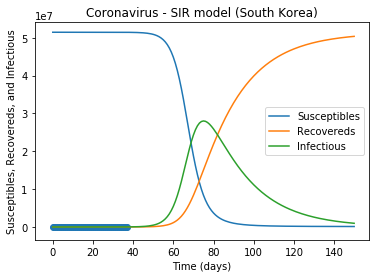

In [84]:
pl.plot(RES[:,0]*country_pop, label='Susceptibles')  # I change -g to g--  # RES[:,0], '-g',
pl.plot(RES[:,2]*country_pop, label='Recovereds')  # RES[:,2], '-k',
pl.plot(RES[:,1]*country_pop, label='Infectious')
data = [x for x in country['confirmed']][delay:]
pl.scatter([i for i in range(len(data))], data)
pl.legend(loc=0)
pl.title('Coronavirus - SIR model ({})'.format(country_name))
pl.xlabel('Time (days)')
pl.ylabel('Susceptibles, Recovereds, and Infectious')
pl.savefig('sir_sk', dpi=900) # Saves the plot
pl.show()

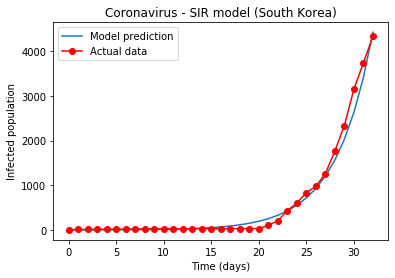

In [85]:
pl.plot(infectious*country_pop, label='Model prediction')
data = [x for x in country_model['confirmed']][delay:]
pl.plot(data, '-ro', label='Actual data')
pl.legend(loc=0)
pl.title('Coronavirus - SIR model ({})'.format(country_name))
pl.xlabel('Time (days)')
pl.ylabel('Infected population')
pl.savefig('sir_sk_zoom_modeled_data', dpi=900) # Saves the plot
pl.show()

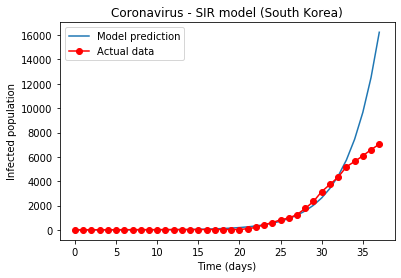

In [89]:
# plotting the true curve against the model (last few probably under the curve from quarantine measures)
pl.plot(RES[:,1][:len(country_model)-delay+points_removed]*country_pop, label='Model prediction')
data = [x for x in country['confirmed']][delay:]
pl.plot(data, '-ro', label='Actual data')
pl.legend(loc=0)
pl.title('Coronavirus - SIR model ({})'.format(country_name))
pl.xlabel('Time (days)')
pl.ylabel('Infected population')
pl.savefig('sir_sk_zoom_actual_v_model', dpi=900) # Saves the plot
pl.show()